In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Batoid4LOFT.LAZULI_STOP import Lazuli_stop, readBulkMotion, readDeformation
from tqdm import tqdm

In [ ]:
lazuli = Lazuli_stop()

fields_x = np.linspace(-16.2, 16.2, 33) / 60 # +/- 16.2 arcmin in x
fields_y = np.linspace(-4.8, 4.8, 11) / 60  # +/- 4.8 arcmin in y

opds = []
rms_vals = np.zeros((len(fields_x), len(fields_y)))

with tqdm(total=len(fields_x) * len(fields_y)) as pbar:
    for i, fx in enumerate(fields_x):
        for j, fy in enumerate(fields_y):
            raytrace = lazuli.get_OPD(fieldX=fx, fieldY=fy, npx=128)
            opds.append(raytrace['wavefront'].array.data * ~raytrace['wavefront'].array.mask)
            rms_vals[i, j] = np.sqrt(np.mean(opds[-1] ** 2))
            pbar.update(1)

  0%|          | 0/363 [00:00<?, ?it/s]

100%|██████████| 363/363 [00:02<00:00, 171.54it/s]


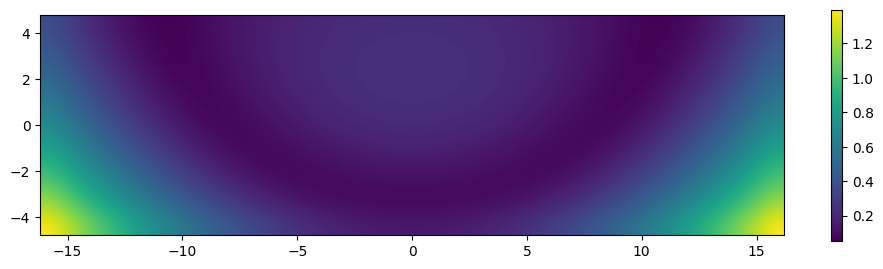

In [24]:
plt.figure(figsize=(12, 3))
plt.imshow(rms_vals.T, interpolation='bicubic', extent=[-16.2, 16.2, -4.8, 4.8])
plt.colorbar()

In [ ]:
x = np.linspace(-16.2, 16.2, 162*2+1) / 60
y = np.linspace(-4.8, 4.8, 48*2+1) / 60
x, y = np.meshgrid(x, y)

